Topic: Benson Challenges 
Subject: Explore MTA turnstile data 
Date: 07/02/2019 
Name: Katherine Bell

<h3>Challenge 1 <h3>

In [71]:
import pandas as pd
import datetime
import requests
import matplotlib.pyplot as plt
import itertools

In [ ]:
# more concise construction of date_combo  
date_list = [range(1,20), range(3,7),range(1,32)]
date_combo = [sub_list for sub_list in itertools.product(*date_list)]

url_lead = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_'
url_list = []
dfs = []

# - this checks the url is valid and adds them to a list
for year, month, day in date_combo:
    # year, month, day are integers
    # so we use f string here
    concat_url = f'{url_lead}{year}{month:02}{day:02}.txt'

    response = requests.get(concat_url)
    if response.status_code == 200:
        url_list.append(concat_url)

        # append to dfs and save csv
        dfs.append(pd.read_csv(concat_url, header = 0, sep = ','))
        dfs[-1].to_csv(f'/Users/kathmbell/Documents/Metis-Bootcamp/GitHub/{year}{month:02}{day:02}.csv')

# # we don't need to request the txt files again:
df = pd.concat(dfs, ignore_index = True)
df.to_csv(r'/Users/kathmbell/Documents/Metis-Bootcamp/GitHub/seasonal_mta_data_01.csv')

In [4]:
# -- creating a smaller dataset to pull from

import os
import glob
import pandas as pd
# os.chdir("/mydir")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [24]:
df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190706.txt',header = 0, sep=',')
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,00:00:00,REGULAR,7116734,2410183
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,08:00:00,REGULAR,7116770,2410218
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,12:00:00,REGULAR,7116856,2410288
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,16:00:00,REGULAR,7117076,2410346
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,20:00:00,REGULAR,7117340,2410387


<h3>Challenge 2 <h3>

In [25]:
import datetime

# # - combine and convert time and date 
# - datetime has to convert a string-type
df['datetime'] = pd.to_datetime(df['DATE'].astype(str) + ' ' + df['TIME'].astype(str))
df['TIME'] = pd.to_datetime(df['TIME'].astype(str))
df['TIME'] = pd.to_datetime(df['DATE'].astype(str))


In [38]:
df.columns = df.columns.str.strip().str.lower() 
df.head()

# df['Data4'] = df['Data3'].groupby(df['Date']).transform('sum')

df['exit_increments'] = df.groupby(['c/a','unit','scp','station','date'])['exits'].apply(lambda x: x.diff())
df['entry_increments'] = df.groupby(['c/a','unit','scp','station','date'])['entries'].apply(lambda x: x.diff())
    

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime,exit_increments,entry_increments
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,2019-06-29,REGULAR,7116734,2410183,2019-06-29 00:00:00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,2019-06-29,REGULAR,7116770,2410218,2019-06-29 08:00:00,35.0,36.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,2019-06-29,REGULAR,7116856,2410288,2019-06-29 12:00:00,70.0,86.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,2019-06-29,REGULAR,7117076,2410346,2019-06-29 16:00:00,58.0,220.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,2019-06-29,REGULAR,7117340,2410387,2019-06-29 20:00:00,41.0,264.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/30/2019,2019-06-30,REGULAR,7117480,2410406,2019-06-30 00:00:00,NaN,NaN
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/30/2019,2019-06-30,REGULAR,7117508,2410415,2019-06-30 04:00:00,9.0,28.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/30/2019,2019-06-30,REGULAR,7117523,2410431,2019-06-30 08:00:00,16.0,15.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/30/2019,2019-06-30,REGULAR,7117610,2410486,2019-06-30 12:00:00,55.0,87.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/30/2019,2019-06-30,REGULAR,7117803,2410531,2019-06-30 16:00:00,45.0,193.0


In [41]:
df['exit_increments'] = df['exit_increments'].fillna(0)
df['entry_increments'] = df['entry_increments'].fillna(0)
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime,exit_increments,entry_increments
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,2019-06-29,REGULAR,7116734,2410183,2019-06-29 00:00:00,0.0,0.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,2019-06-29,REGULAR,7116770,2410218,2019-06-29 08:00:00,35.0,36.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,2019-06-29,REGULAR,7116856,2410288,2019-06-29 12:00:00,70.0,86.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,2019-06-29,REGULAR,7117076,2410346,2019-06-29 16:00:00,58.0,220.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,2019-06-29,REGULAR,7117340,2410387,2019-06-29 20:00:00,41.0,264.0


In [44]:
df.drop(columns = ["time"])

,c/a,unit,scp,station,linename,division,date,desc,entries,exits,datetime,exit_increments,entry_increments
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,REGULAR,7116734,2410183,2019-06-29 00:00:00,0.0,0.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,REGULAR,7116770,2410218,2019-06-29 08:00:00,35.0,36.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,REGULAR,7116856,2410288,2019-06-29 12:00:00,70.0,86.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,REGULAR,7117076,2410346,2019-06-29 16:00:00,58.0,220.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,REGULAR,7117340,2410387,2019-06-29 20:00:00,41.0,264.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/30/2019,REGULAR,7117480,2410406,2019-06-30 00:00:00,0.0,0.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/30/2019,REGULAR,7117508,2410415,2019-06-30 04:00:00,9.0,28.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/30/2019,REGULAR,7117523,2410431,2019-06-30 08:00:00,16.0,15.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/30/2019,REGULAR,7117610,2410486,2019-06-30 12:00:00,55.0,87.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/30/2019,REGULAR,7117803,2410531,2019-06-30 16:00:00,45.0,193.0


<h3>Challenge 3 <h3>

In [109]:
# - drop any crazy high or crazy low values

outliers_mask = (df["entry_increments"] < 5000) & (df["exit_increments"] < 5000) & (df["entry_increments"] > 0) & (df["exit_increments"] > 0)

df_cleaned = df[outliers_mask]
type(df_cleaned)

df_cleaned.sort_values('exit_increments', ascending = False)




,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime,exit_increments,entry_increments
53512,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,07/01/2019,2019-07-01,REGULAR,1466739,5794196,2019-07-01 20:00:00,4341.0,120.0
127482,PTH21,R540,01-00-00,PATH WTC 2,1,PTH,07/01/2019,2019-07-01,REGULAR,21829,143662,2019-07-01 11:34:28,4230.0,111.0
53518,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,07/02/2019,2019-07-02,REGULAR,1468784,5804938,2019-07-02 20:00:00,4065.0,125.0
163079,R240,R047,00-00-00,GRD CNTRL-42 ST,4567S,IRT,07/01/2019,2019-07-01,REGULAR,5358122,13230511,2019-07-01 13:00:00,3846.0,271.0
53554,N063A,R011,00-00-01,42 ST-PORT AUTH,ACENQRS1237W,IND,07/01/2019,2019-07-01,REGULAR,1280169171,176437622,2019-07-01 20:00:00,3837.0,240.0
163085,R240,R047,00-00-00,GRD CNTRL-42 ST,4567S,IRT,07/02/2019,2019-07-02,REGULAR,5361082,13242637,2019-07-02 13:00:00,3824.0,291.0
53560,N063A,R011,00-00-01,42 ST-PORT AUTH,ACENQRS1237W,IND,07/02/2019,2019-07-02,REGULAR,1280173112,176444849,2019-07-02 20:00:00,3809.0,194.0
163092,R240,R047,00-00-00,GRD CNTRL-42 ST,4567S,IRT,07/03/2019,2019-07-03,REGULAR,5363982,13254448,2019-07-03 13:00:00,3648.0,269.0
163084,R240,R047,00-00-00,GRD CNTRL-42 ST,4567S,IRT,07/02/2019,2019-07-02,REGULAR,5360791,13238813,2019-07-02 09:00:00,3505.0,43.0
163078,R240,R047,00-00-00,GRD CNTRL-42 ST,4567S,IRT,07/01/2019,2019-07-01,REGULAR,5357851,13226665,2019-07-01 09:00:00,3487.0,48.0


In [65]:
# - group by turnstile by day

df_cleaned = df_cleaned.groupby(['c/a','unit','scp','station','date'])["exit_increments","entry_increments"].apply(lambda x: x.astype(int).sum()).reset_index()

df_cleaned.head()

,c/a,unit,scp,station,date,exit_increments,entry_increments
0,A002,R051,02-00-00,59 ST,06/29/2019,204,606
1,A002,R051,02-00-00,59 ST,06/30/2019,162,526
2,A002,R051,02-00-00,59 ST,07/01/2019,378,1278
3,A002,R051,02-00-00,59 ST,07/02/2019,442,1347
4,A002,R051,02-00-00,59 ST,07/03/2019,389,1276


<h3>Challenge 4 <h3>

In [110]:
turnstile_mask = (df_cleaned['scp'] == '02-00-01'
                         ) & (df_cleaned['station'] == '59 ST')

# - apply mask  
single_turnstile = df_cleaned[turnstile_mask]

# - make var for plotting
single_turnstile_plot = single_turnstile.drop(['c/a', 'unit', 'scp','station'], axis = 1)


''

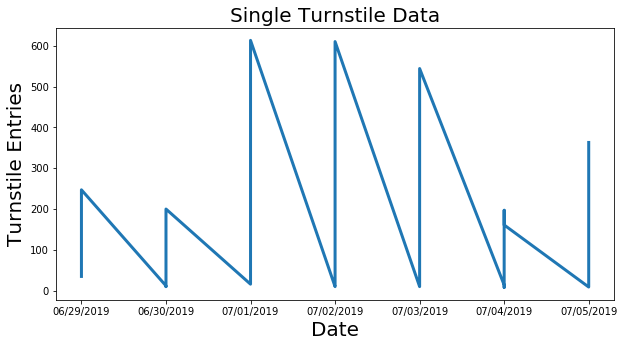

In [111]:
plt.figure(figsize = [10,5])
plt.plot(single_turnstile_plot.date.astype('O')
         , single_turnstile_plot.entry_increments, linewidth = 3)
plt.title("Single Turnstile Data", family = 'monotype', fontsize = 20)
plt.xlabel("Date", family = 'monotype', fontsize = 20)
# plt.xticks(x, rotation=30)
plt.ylabel("Turnstile Entries", family = 'monotype', fontsize = 20)
;

<h3>Challenge 5 <h3>

In [112]:
station_grouping = df_cleaned.groupby(['c/a','unit','station','date'])["exit_increments","entry_increments"].apply(lambda x: x.astype(int).sum()).reset_index()
station_grouping.head()


,c/a,unit,station,date,exit_increments,entry_increments
0,A002,R051,59 ST,06/29/2019,3635,5927
1,A002,R051,59 ST,06/30/2019,3209,5098
2,A002,R051,59 ST,07/01/2019,7231,10633
3,A002,R051,59 ST,07/02/2019,7587,11141
4,A002,R051,59 ST,07/03/2019,7057,11006


<h3>Challenge 6 <h3>

In [113]:
overall_station_grouping = df_cleaned.groupby(['station','date'])["exit_increments","entry_increments"].apply(lambda x: x.astype(int).sum()).reset_index()
overall_station_grouping.head()


,station,date,exit_increments,entry_increments
0,1 AV,06/29/2019,10373,8346
1,1 AV,06/30/2019,10292,8554
2,1 AV,07/01/2019,16919,14870
3,1 AV,07/02/2019,16789,14964
4,1 AV,07/03/2019,16684,15270


<h3>Challenge 7 <h3>

In [114]:
overall_station_grouping_mask = (df_cleaned['station'] == '59 ST')
overall_station_grouping_single_station = df_cleaned[overall_station_grouping_mask]
overall_station_grouping_single_station_plot = overall_station_grouping_single_station.groupby(['station','date'])["exit_increments","entry_increments"].apply(lambda x: x.astype(int).sum()).reset_index()
overall_station_grouping_single_station_plot

,station,date,exit_increments,entry_increments
0,59 ST,06/29/2019,25192,27201
1,59 ST,06/30/2019,20985,21825
2,59 ST,07/01/2019,48961,52870
3,59 ST,07/02/2019,51178,55453
4,59 ST,07/03/2019,46934,53633
5,59 ST,07/04/2019,18220,20319
6,59 ST,07/05/2019,32949,34941


''

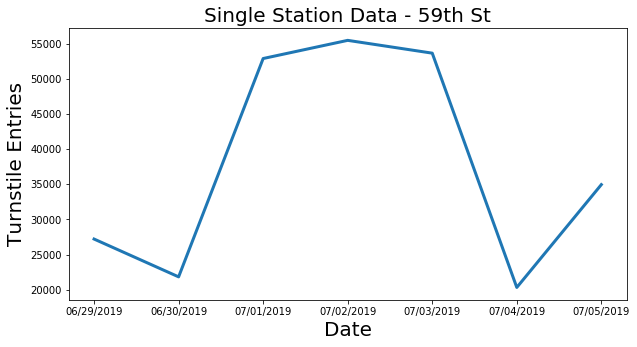

In [115]:
plt.figure(figsize = [10,5])
plt.plot(overall_station_grouping_single_station_plot.date.astype('O')
         , overall_station_grouping_single_station_plot.entry_increments, linewidth = 3)
plt.title("Single Station Data - 59th St", family = 'monotype', fontsize = 20)
plt.xlabel("Date", family = 'monotype', fontsize = 20)
# plt.xticks(x, rotation=30)
plt.ylabel("Turnstile Entries", family = 'monotype', fontsize = 20)
;

<h3>Challenge 8 <h3>

In [116]:
# - week of year
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned['week_num'] = df_cleaned['date'].dt.week
df_cleaned['year'] = df_cleaned['date'].dt.year

/Users/kathmbell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/kathmbell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kathmbell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [117]:
week_year_group = df_cleaned.groupby(['station','year','week_num'])["exit_increments","entry_increments"].apply(lambda x: x.astype(int).sum()).reset_index()

week_year_group.head()

,station,year,week_num,exit_increments,entry_increments
0,1 AV,2019,26,20665,16900
1,1 AV,2019,27,71652,62839
2,103 ST,2019,26,21215,31141
3,103 ST,2019,27,77079,113242
4,103 ST-CORONA,2019,26,16591,24231


<h3>Challenge 9 <h3>

In [118]:
week_year_group.loc[week_year_group['exit_increments'].idxmax()]

station             34 ST-PENN STA
year                          2019
week_num                        27
exit_increments             588509
entry_increments            598210
Name: 122, dtype: object

In [119]:
week_year_group.loc[week_year_group['entry_increments'].idxmax()]

station             34 ST-PENN STA
year                          2019
week_num                        27
exit_increments             588509
entry_increments            598210
Name: 122, dtype: object

<h3>Challenge 10 <h3>

In [121]:
week_year_group = week_year_group.sort_values('entry_increments', ascending = False)
week_year_group.head(5)

,station,year,week_num,exit_increments,entry_increments
122,34 ST-PENN STA,2019,27,588509,598210
464,GRD CNTRL-42 ST,2019,27,483511,513572
118,34 ST-HERALD SQ,2019,27,414911,406165
450,FULTON ST,2019,27,352230,380634
93,23 ST,2019,27,293246,370530


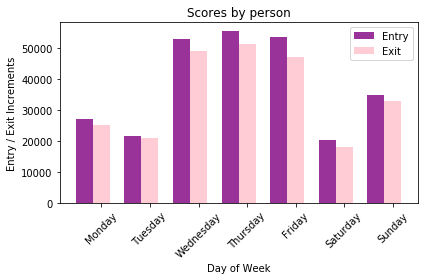

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 7

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(overall_station_grouping_single_station_plot.date
                 , overall_station_grouping_single_station_plot.entry_increments, bar_width,
alpha=opacity,
color='purple',
label='Entry')

rects2 = plt.bar(index + bar_width
                 , overall_station_grouping_single_station_plot.exit_increments, bar_width,
alpha=opacity,
color='pink',
label='Exit')

plt.xlabel('Day of Week')
plt.ylabel('Entry / Exit Increments')
plt.title('Scores by person')
plt.xticks(index + bar_width, ('Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'),rotation=45)
plt.legend()

plt.tight_layout()
plt.show()